<a target="_blank" href="https://colab.research.google.com/github/PacktPublishing/Deep-Learning-Model-Visualization/blob/main/Chapter02/DLMV_Chapter02_01_Matplotlib.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Chapter 02 - 01 - Matplotlib

## Loading Data

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

print('Data shape:', iris.data.shape)
print('Feature names:', iris.feature_names)
print('Target shape', iris.target.shape)
print('Target values:', np.unique(iris.target))
print('Target names:', iris.target_names)

Data shape: (150, 4)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape (150,)
Target values: [0 1 2]
Target names: ['setosa' 'versicolor' 'virginica']


## Import matplotlib

In [2]:
import matplotlib.pyplot as plt
# this is to increase the dpi for better graphics
# plt.rcParams["figure.dpi"] = 300

# Barchart

In [3]:
counts = [
    sum(iris.target == t)
    for t
    in np.unique(iris.target)
    ]

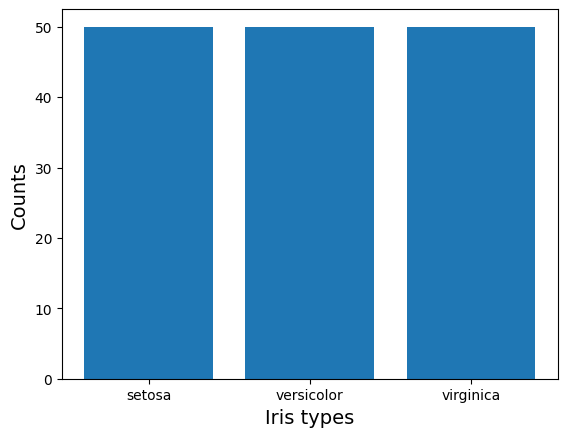

In [4]:
plt.bar(
    x=iris.target_names,
    height=counts,
    )
plt.xlabel('Iris types', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

## Scatter plot

Text(0, 0.5, 'sepal width (cm)')

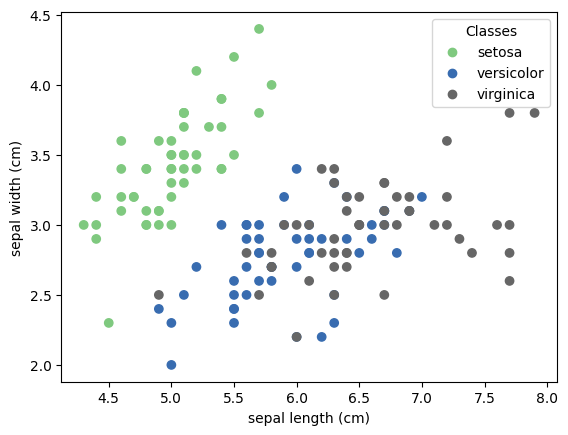

In [5]:
# more colormaps:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
feature0 = 0
feature1 = 1
scatter = plt.scatter(
    x=iris.data[:, feature0],
    y=iris.data[:, feature1],
    c=iris.target, # data used for color
    cmap='Accent'
    )
plt.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="upper right",
    title="Classes"
);
plt.xlabel(iris.feature_names[feature0])
plt.ylabel(iris.feature_names[feature1])


## Distribution plot


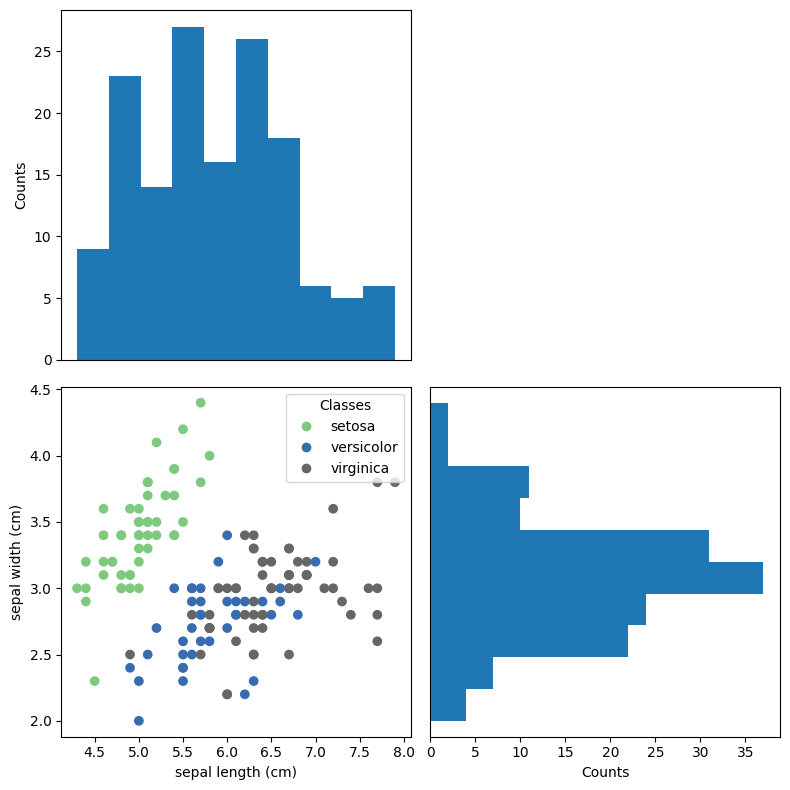

In [6]:
# Set the figure with 2x2 grid
# each axes has an x-axis and y-axis
figure, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(8, 8))
# Display the histogram for feature 0
axes[0, 0].hist(
    x=iris.data[:, feature0],
    bins=10,
)
axes[0, 0].set_xticks([]) # off for this
axes[0, 0].set_ylabel('Counts')
# Display the histogram for feature 1
axes[1, 1].hist(
    x=iris.data[:, feature1],
    bins=10,
    orientation='horizontal'
)

axes[1, 1].set_yticks([])
axes[1, 1].set_xlabel('Counts')

# Display Scatter
scatter = axes[1, 0].scatter(
    x=iris['data'][:, feature0],
    y=iris['data'][:, feature1],
    c=iris['target'], # data used for color
    cmap='Accent'
)
axes[1, 0].set_xlabel(iris.feature_names[feature0])
axes[1, 0].set_ylabel(iris.feature_names[feature1])
axes[1, 0].legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="upper right",
    title="Classes"
);

# remove the top right axis
figure.delaxes(axes[0, 1])
plt.tight_layout()
plt.show()

# 3D Plot with Matplotlib

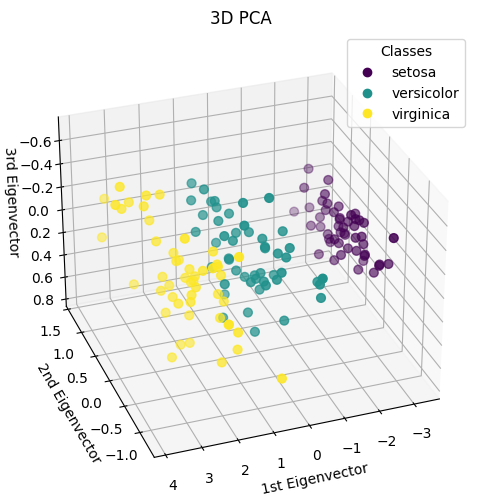

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit_transform(iris.data)

figure = plt.figure(1, figsize=(8, 6))
ax = figure.add_subplot(
    1, # nrows
    1, # ncols
    1, # index (start from 1)
    projection="3d",
    elev=-150, # elevation (0 to 360 degree)
    azim=110 # azimuth (0 to 360 degree)
)
scatter = ax.scatter(
    xs=pca[:, 0],
    ys=pca[:, 1],
    zs=pca[:, 2],
    c=iris.target,
    s=40, # marker size
)

ax.set_title("3D PCA")
ax.set_xlabel("1st Eigenvector")
ax.set_ylabel("2nd Eigenvector")
ax.set_zlabel("3rd Eigenvector")


ax.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="upper right",
    title="Classes"
);

plt.show()


# Training

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
# define model
model = keras.Sequential([
    keras.layers.Dense(
        units = 16,
        input_dim=4,
        activation ='relu',
        name='Hidden1'
    ),
    keras.layers.Dense(
        units = 32,
        input_dim=4,
        activation ='relu',
        name='Hidden2'
    ),
    keras.layers.Dense(
        units=3,
        activation='softmax',
        name='Output')
]);

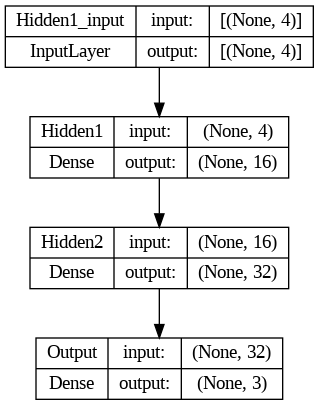

In [10]:
keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, # X
    iris.target, # y
    test_size=0.2
    )

In [13]:
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_test, y_test),
    batch_size = 32,
    epochs=50
    )

Epoch 1/50
4/4 [==============================] - 5s 284ms/step - loss: 0.9919 - accuracy: 0.3667 - val_loss: 0.9806 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 0s 57ms/step - loss: 0.9619 - accuracy: 0.4833 - val_loss: 0.9606 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 65ms/step - loss: 0.9423 - accuracy: 0.6167 - val_loss: 0.9401 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 0s 54ms/step - loss: 0.9206 - accuracy: 0.6833 - val_loss: 0.9183 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 44ms/step - loss: 0.8985 - accuracy: 0.7000 - val_loss: 0.8947 - val_accuracy: 0.7333
Epoch 6/50
4/4 [==============================] - 0s 72ms/step - loss: 0.8741 - accuracy: 0.7250 - val_loss: 0.8691 - val_accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 0s 23ms/step - loss: 0.8484 - accuracy: 0.7167 - val_loss: 0.8414 - val_accuracy: 0.7333
Epoch 8/50
4/4 [==========

In [14]:
train_data = history.history
train_data.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

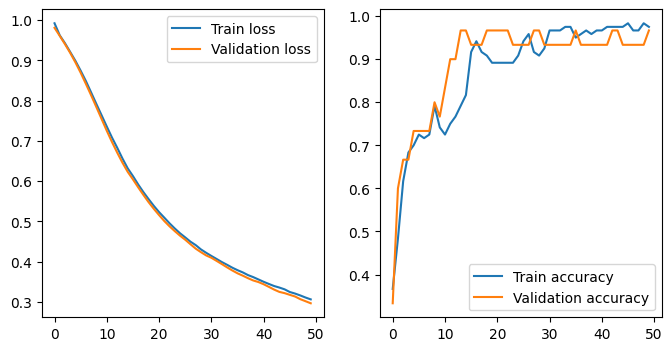

In [15]:
fig = plt.figure(figsize=((8,4)))
# loss metrics
ax_train = fig.add_subplot(121)
ax_train.plot(
    train_data['loss'],
    label='Train loss')
ax_train.plot(
    train_data['val_loss'],
    label='Validation loss')
ax_train.legend()
# accuracy metrics
ax_test = fig.add_subplot(122)
ax_test.plot(
    train_data['accuracy'],
    label='Train accuracy'
)
ax_test.plot(
    train_data['val_accuracy'],
    label='Validation accuracy'
)
ax_test.legend()
plt.show()

# Ananlyze results with confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cfm = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred
    )
cfm

1/1 [==============================] - 0s 84ms/step


array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

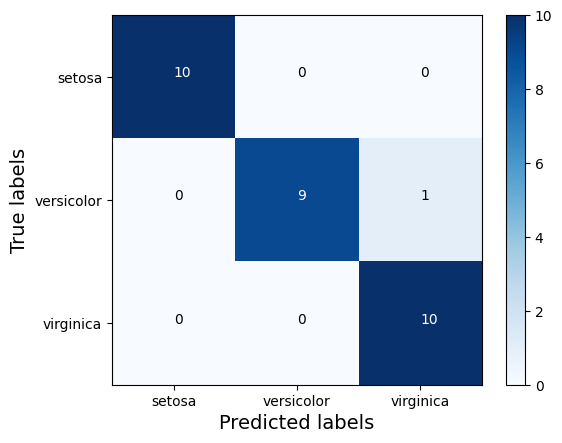

In [17]:
plt.imshow(cfm,
           cmap='Blues',
           interpolation='nearest'
           )
plt.colorbar()
# plot the texts (numbers)
thresh = cfm.max()/2
for r in range(cfm.shape[0]):
  for c in range(cfm.shape[1]):
    v = cfm[r][c]
    color = 'white' if v > thresh else 'black'
    plt.text(
        x=c,
        y=r,
        s=v,
        color=color
        )
# change ticks
plt.xticks(
    ticks=np.arange(len(iris.target_names)),
    labels=iris.target_names)
plt.yticks(
    ticks=np.arange(len(iris.target_names)),
    labels=iris.target_names
)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.show()